# 数値計算と理論地の比較 図表用

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_xmin import ds2s_OV_xmin
from lib.funcs import *

In [2]:
x_min = 0.1  # 車両の長さ: 4.7mで換算

L = 10.0  # レーンの長さ: 470m
n_0 = 5

x_0 = (7.7/4.7) * x_min  # 最小車間距離: 車両の長さ+3mで換算
v_0 = (1000/36)/4.7 * x_min  # 車両の最高速度: 法定速度100km/hで換算
dt = 1.0  # 時間差分1秒
dx = 0.1  # テキトー。基本図がいい感じになるように調整

In [3]:
L, n_0, x_0, v_0, dt, dx, x_min

(10.0, 5, 0.16382978723404257, 0.591016548463357, 1.0, 0.1, 0.1)

In [4]:
density = [K/L for K in range(101)]
flow = [
	flow_stable(
		density=d,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		xmin=x_min
	) for d in density
]

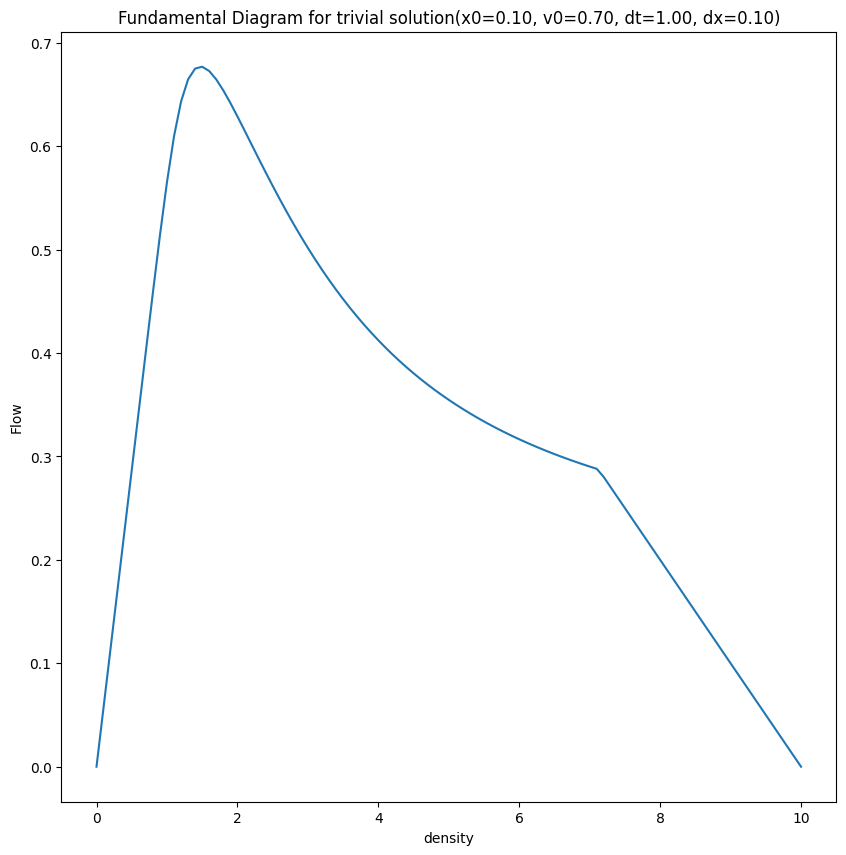

In [5]:
plt.figure(figsize=(10, 10))
plt.xlabel("density")
plt.ylabel("Flow")
plt.title(
	"Fundamental Diagram for trivial solution"
	+ "(x0={:.2f}, v0={:.2f}, dt={:.2f}, dx={:.2f})"
		.format(0.1, 0.7, 1.0, 0.1)
)
plt.plot(density, flow)
plt.show()

In [6]:
data = {}
for id, K in enumerate(range(101)):
	model = ds2s_OV_xmin(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		x_min=x_min,
		x_init=np.array([L / K * i for i in range(K)], dtype=np.float64),
		n_max=2010,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = { "50 100": model.flow(50, 100) }
	data[id] = js

In [7]:
density_exp = [js["density"] for js in data.values()]
flow_exp = [js["flow"]["50 100"] for js in data.values()]

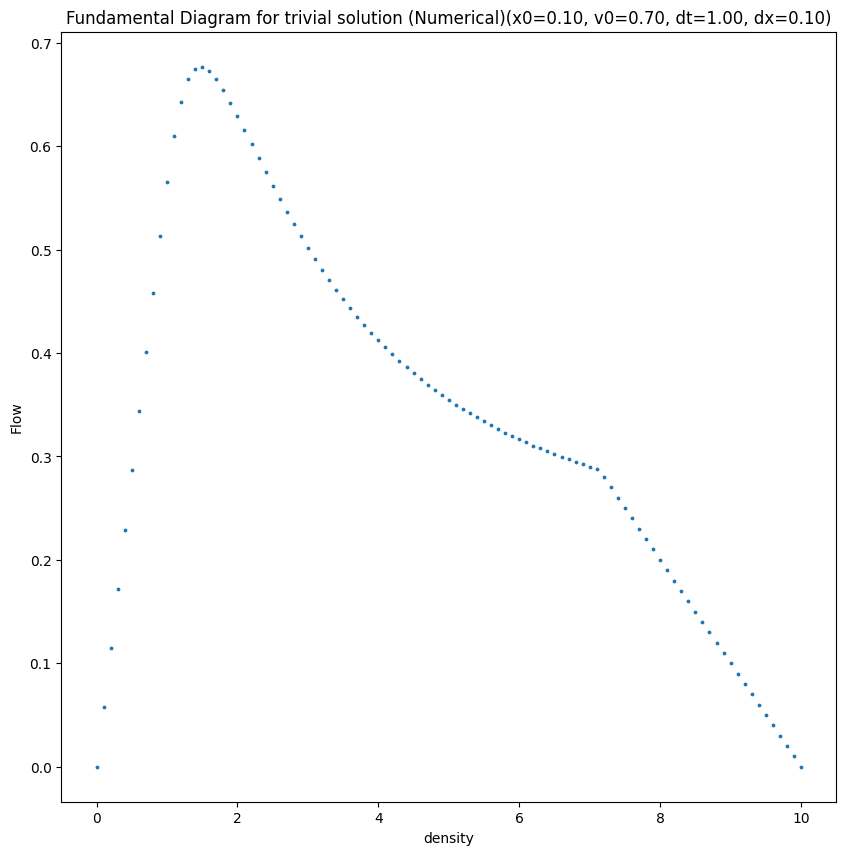

In [8]:
plt.figure(figsize=(10, 10))
plt.xlabel("density")
plt.ylabel("Flow")
plt.title(
	"Fundamental Diagram for trivial solution (Numerical)"
	+ "(x0={:.2f}, v0={:.2f}, dt={:.2f}, dx={:.2f})"
		.format(0.1, 0.7, 1.0, 0.1)
)
plt.scatter(density_exp, flow_exp, s=3)
plt.show()

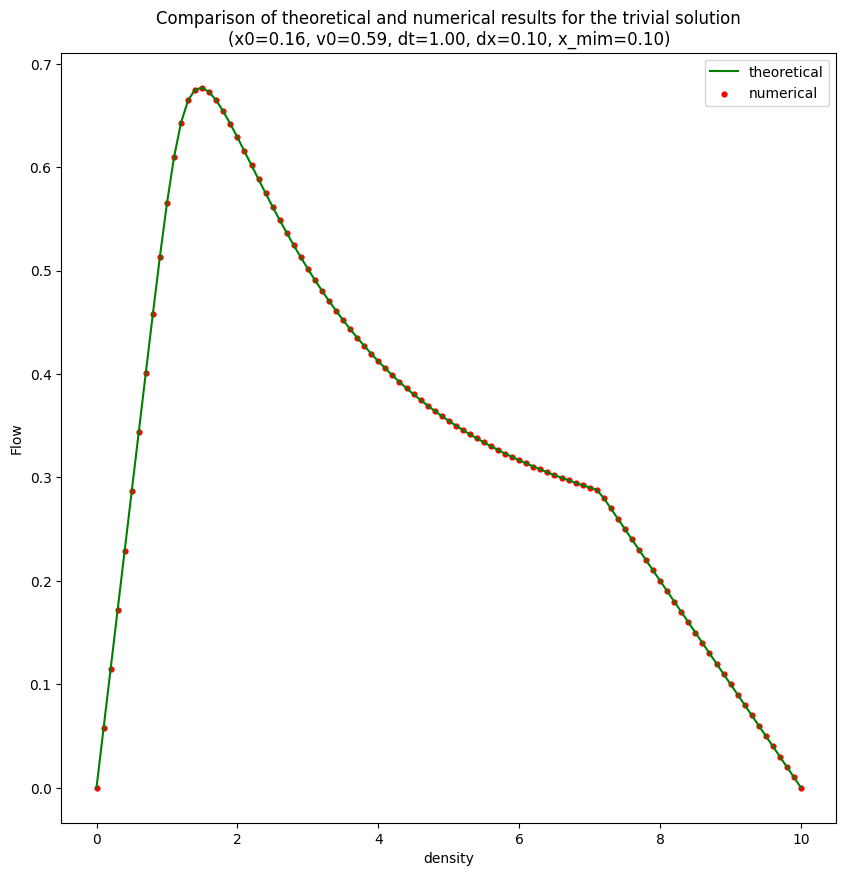

In [32]:
plt.figure(figsize=(10, 10))
plt.xlabel("density")
plt.ylabel("Flow")
plt.title(
	"Comparison of theoretical and numerical results for the trivial solution"
	+ "\n(x0={:.2f}, v0={:.2f}, dt={:.2f}, dx={:.2f}, x_mim={:.2f})"
		.format(x_0, v_0, dt, dx, x_min)
)
plt.plot(density, flow, color="green", label="theoretical")
plt.scatter(density_exp, flow_exp, s=12, color="red", label="numerical")
plt.legend()